In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns 
import sklearn

In [ ]:
df=pd.read_csv('drive/MyDrive/covid_prediction/data_washing.csv',index_col=None)
df

,Unnamed: 0,state_code,gender,age_bucket,pct_cli,pct_ili,pct_cli_anosmia_ageusia,pct_hh_cli,pct_cmnty_cli,pct_hh_fever,pct_hh_sore_throat,pct_hh_cough,pct_hh_shortness_of_breath,pct_hh_difficulty_breathing,mean_hh_cli_ct,mean_cmnty_cli_ct,pct_self_fever,pct_self_cough,pct_self_shortness_of_breath,pct_self_difficulty_breathing,pct_self_tiredness_or_exhaustion,pct_self_nasal_congestion,pct_self_runny_nose,pct_self_muscle_joint_aches,pct_self_sore_throat,pct_self_persistent_pain_pressure_in_chest,pct_self_nausea_vomiting,pct_self_diarrhea,pct_self_anosmia_ageusia,pct_self_other,pct_self_none_of_above,pct_self_multiple_symptoms,pct_worked_outside_home,pct_avoid_contact_all_or_most_time,mean_outside_hh_contact_at_work_ct,mean_outside_hh_contact_shopping_ct,mean_outside_hh_contact_in_social_gatherings_ct,pct_contact_covid_positive,pct_diabetes,pct_cancer,...,pct_hh_fever_weighted,pct_hh_sore_throat_weighted,pct_hh_cough_weighted,pct_hh_shortness_of_breath_weighted,pct_hh_difficulty_breathing_weighted,mean_hh_cli_ct_weighted,mean_cmnty_cli_ct_weighted,pct_self_fever_weighted,pct_self_cough_weighted,pct_self_shortness_of_breath_weighted,pct_self_difficulty_breathing_weighted,pct_self_tiredness_or_exhaustion_weighted,pct_self_nasal_congestion_weighted,pct_self_runny_nose_weighted,pct_self_muscle_joint_aches_weighted,pct_self_sore_throat_weighted,pct_self_persistent_pain_pressure_in_chest_weighted,pct_self_nausea_vomiting_weighted,pct_self_diarrhea_weighted,pct_self_anosmia_ageusia_weighted,pct_self_other_weighted,pct_self_none_of_above_weighted,pct_self_multiple_symptoms_weighted,pct_worked_outside_home_weighted,pct_avoid_contact_all_or_most_time_weighted,mean_outside_hh_contact_at_work_ct_weighted,mean_outside_hh_contact_shopping_ct_weighted,mean_outside_hh_contact_in_social_gatherings_ct_weighted,pct_contact_covid_positive_weighted,pct_diabetes_weighted,pct_cancer_weighted,pct_heart_disease_weighted,pct_high_blood_pressure_weighted,pct_asthma_weighted,pct_chronic_lung_disease_weighted,pct_kidney_disease_weighted,pct_autoimmune_disorder_weighted,pct_no_above_medical_conditions_weighted,pct_multiple_medical_conditions_weighted,test_condition
0,0,1,0,1,0.323867,0.348783,0.379027,0.388048,0.000000,0.461960,0.638093,0.598531,0.370103,0.359528,0.000000e+00,0.000000e+00,0.443949,0.672148,0.504481,0.49327,0.543936,0.656060,0.761114,0.488079,0.639387,0.46338,0.424728,0.610609,0.275471,0.547903,0.141974,0.721336,0.274170,0.904534,1.475129e-50,1.213519e-60,2.911333e-55,0.019958,0.159183,0.213039,...,0.343472,0.579229,0.566903,0.308317,0.259445,0.000000e+00,0.000000e+00,0.198804,0.582302,0.400565,0.310742,0.520255,0.647022,0.766240,0.437501,0.572695,0.280777,0.383187,0.477173,0.173949,0.401280,0.202956,0.723344,0.321818,0.882263,1.500442e-50,2.481172e-60,7.273437e-55,0.013368,0.175930,0.213647,0.091094,0.294283,0.456482,0.170564,0.079480,0.457456,0.532116,0.282010,0.0
1,1,2,0,1,0.199083,0.170650,0.259626,0.214647,0.000000,0.279048,0.520302,0.493171,0.284474,0.221522,0.000000e+00,0.000000e+00,0.253407,0.545792,0.351963,0.23891,0.427227,0.504151,0.443089,0.373363,0.511805,0.29010,0.273527,0.357721,0.230616,0.299721,0.419983,0.537676,0.331460,0.897199,1.635925e-50,1.621882e-60,1.190333e-55,0.081290,0.185398,0.192093,...,0.205705,0.450385,0.506391,0.320475,0.223743,0.000000e+00,0.000000e+00,0.147282,0.524666,0.390442,0.256720,0.378391,0.509274,0.461227,0.372476,0.486670,0.226694,0.302731,0.313659,0.218517,0.229937,0.476828,0.540055,0.321969,0.896321,1.239214e-50,3.166641e-60,1.513281e-55,0.077283,0.224622,0.155893,0.147985,0.311856,0.388265,0.172120,0.157791,0.411054,0.580915,0.303440,0.0
2,2,3,1,2,0.000000,0.000000,0.323708,0.130102,0.000000,0.130102,0.355343,0.343238,0.404442,0.297374,0.000000e+00,0.000000e+00,0.000000,0.404257,0.531913,0.21277,0.289121,0.186177,0.358733,0.296891,0.366134,0.21277,0.077505,0.171543,0.392100,0.081236,0.770967,0.194611,0.239429,0.886453,1.898595e-51,4.364808e-61,1.640333e-55,0.000000,0.504083,0.432946,...,0.144989,0.

In [ ]:
df.shape

(5000, 94)

In [ ]:
from tensorflow.keras import optimizers,losses

In [ ]:
#整理df1資料
df1=df
df1=df1.fillna(0)
df1=df1.drop(["Unnamed: 0",'test_condition'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X=df1
Y=df["test_condition"].astype(int)
x_train1,x_test,y_train1,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_train1,y_train1,test_size=0.25,random_state=42)
x_train.shape,y_train.shape,x_val.shape,y_val.shape

((3000, 92), (3000,), (1000, 92), (1000,))

In [ ]:
X.isna().values.any()
Y.isna().values.any()

False

In [ ]:
import tensorflow as tf
from keras.layers.core.activation import Activation
from keras import models,layers
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)


In [ ]:
#0.65121 batch 128 epochs 500
model=models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(92,)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(layers.Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(layers.Dense(8,activation='relu'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 32)                2976      
                                                                 
 dense_20 (Dense)            (None, 16)                528       
                                                                 
 dense_21 (Dense)            (None, 8)                 136       
                                                                 
 dense_22 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3,649
Trainable params: 3,649
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

In [170]:
model=models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(92,)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(layers.Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(layers.Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(layers.Dense(8,activation='relu'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 32)                2976      
                                                                 
 batch_normalization_75 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 activation_75 (Activation)  (None, 32)                0         
                                                                 
 dropout_72 (Dropout)        (None, 32)                0         
                                                                 
 dense_105 (Dense)           (None, 16)                528       
                                                                 
 batch_normalization_76 (Bat  (None, 16)               64        
 chNormalization)                                    

In [171]:
model.compile(optimizer='Adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=["accuracy"])

In [172]:
history=model.fit(x_train,y_train,epochs=500,batch_size=128,validation_data=(x_val,y_val))

Epoch 1/500
24/24 [==============================] - 2s 18ms/step - loss: 0.8017 - accuracy: 0.7247 - val_loss: 0.6872 - val_accuracy: 0.7000
Epoch 2/500
24/24 [==============================] - 0s 5ms/step - loss: 0.7762 - accuracy: 0.7313 - val_loss: 0.6797 - val_accuracy: 0.7810
Epoch 3/500
24/24 [==============================] - 0s 5ms/step - loss: 0.7775 - accuracy: 0.7220 - val_loss: 0.6740 - val_accuracy: 0.7810
Epoch 4/500
24/24 [==============================] - 0s 6ms/step - loss: 0.7409 - accuracy: 0.7397 - val_loss: 0.6680 - val_accuracy: 0.7810
Epoch 5/500
24/24 [==============================] - 0s 5ms/step - loss: 0.7426 - accuracy: 0.7350 - val_loss: 0.6624 - val_accuracy: 0.7810
Epoch 6/500
24/24 [==============================] - 0s 5ms/step - loss: 0.7189 - accuracy: 0.7410 - val_loss: 0.6569 - val_accuracy: 0.7810
Epoch 7/500
24/24 [==============================] - 0s 6ms/step - loss: 0.7013 - accuracy: 0.7397 - val_loss: 0.6512 - val_accuracy: 0.7810
Epoch 8/500


In [173]:
result=model.evaluate(x_test,y_test)

32/32 [==============================] - 0s 3ms/step - loss: 0.4196 - accuracy: 0.8240


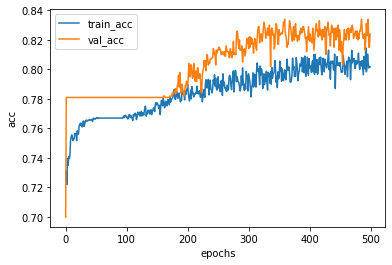

In [174]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],label="train_acc")
plt.plot(history.history["val_accuracy"],label="val_acc")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.legend()

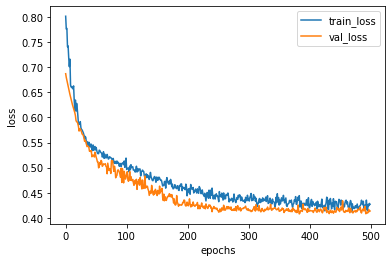

In [175]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],label="train_loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

In [176]:
df_test=pd.read_csv('drive/MyDrive/covid_prediction/test_data_washing.csv')
df_test=df_test.fillna(0)
df_test=df_test.drop(["Unnamed: 0"],axis=1)

In [177]:
import numpy as np
predict_prob=model.predict(df_test)
y=[1 if num>0.5 else 0 for num in predict_prob]

In [178]:
len(y)

906

In [179]:
import csv
j=0
with open('test_prediction.csv','w') as f:
  writer=csv.writer(f)
  writer.writerow(['id','test_condition'])
for i in range(len(y)):
  with open('test_prediction.csv','a+') as f:
    writer=csv.writer(f)
    writer.writerow([j,int(y[i])])
  j=j+1

f.close()